In [1]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np
import random
import csv
import pandas as pd

In [2]:
simtime = 400003
asteroids = 3000

In [3]:
dfa = pd.read_csv("opslag_asteroids.csv")

continue_a_list = []
continue_e_list = []
continue_omega_list = []
continue_inc_list = []

for row_number in range(len(dfa)):
    if dfa.loc[row_number][1] == simtime:
        continue_a_list.append(dfa.loc[row_number][3]) 
        continue_e_list.append(dfa.loc[row_number][5]) 
        continue_omega_list.append(dfa.loc[row_number][7]) 
        continue_inc_list.append(dfa.loc[row_number][9])

    if row_number % 1000 == 0:
        clear_output(wait=True)
        print(round(row_number/len(dfa),4))

    
        


0.9943


In [4]:
dfp = pd.read_csv("opslag_planets.csv")

sun_stuff = []
jupiter_stuff = []
mars_stuff = []

for row_number in range(len(dfp)):
    if dfp.loc[row_number][1] == simtime:
        for i in range(6):
            sun_stuff.append(dfp.loc[row_number][i+2])
            jupiter_stuff.append(dfp.loc[row_number][i+8])
            mars_stuff.append(dfp.loc[row_number][i+14])

In [8]:
sim_continue = rebound.Simulation()


sim_continue.integrator = "WHfast"
sim_continue.dt = 0.1
continue_simtime = 800000

final_a_list = []
final_e_list = []


for j in range (asteroids):
    
    
    # sun
    sim_continue.add(m=0.9999999999950272, x=sun_stuff[0], y=sun_stuff[1], z=sun_stuff[2], vx=sun_stuff[3], vy=sun_stuff[4], vz=sun_stuff[5])
    # jupiter
    sim_continue.add(m=0.0009547919099366768, x=jupiter_stuff[0], y=jupiter_stuff[1], z=jupiter_stuff[2], vx=jupiter_stuff[3], vy=jupiter_stuff[4], vz=jupiter_stuff[5])
    # mars
    sim_continue.add(m=3.2271560828978514e-07, x=mars_stuff[0], y=mars_stuff[1], z=mars_stuff[2], vx=mars_stuff[3], vy=mars_stuff[4], vz=mars_stuff[5])
    sim_continue.move_to_com()
    
    mass = 1e-29
    radius = continue_a_list[j]
    ecc = continue_e_list[j]
    omega = continue_omega_list[j]
    inc = continue_inc_list[j]

    sim_continue.add(m=mass, a=radius, e=ecc, omega=omega, inc=inc)

    sim_continue.steps(int(continue_simtime*(1/sim_continue.dt)))

    final_a_list.append(sim_continue.particles[3].a)
    final_e_list.append(sim_continue.particles[3].e)
    
    # Opslaan in bestandje
    with open('opslag_asteroids.csv', 'a') as f:
        
        # using csv.writer method from CSV package
        write = csv.writer(f)
        write.writerow([asteroids, simtime+continue_simtime, radius, sim_continue.particles[3].a, ecc, sim_continue.particles[3].e,  omega, sim_continue.particles[3].omega, inc, sim_continue.particles[3].inc])
    f.close()

    sun = sim_continue.particles[0]
    mars = sim_continue.particles[1]
    jupiter = sim_continue.particles[2]
    if i == asteroids-1:
        with open('opslag_planets.csv', 'a') as f2:
            write = csv.writer(f2)
            write.writerow([asteroids, simtime+continue_simtime, sun.x, sun.y, sun.z, sun.vx, sun.vy, sun.vz, jupiter.x, jupiter.y, jupiter.z, jupiter.vx, jupiter.vy, jupiter.vz, mars.x, mars.y, mars.z, mars.vx, mars.vy, mars.vz])
        f2.close()


    sim_continue.remove(0)
    sim_continue.remove(0)
    sim_continue.remove(0)
    sim_continue.remove(0)

    if j % 10 == 0:
        clear_output(wait=True)
        print(round(j/asteroids,4))



0.4933


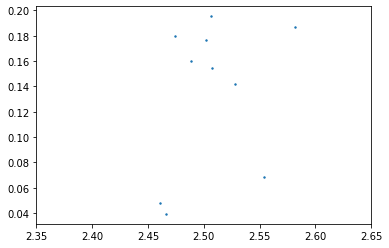

<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(final_a_list, final_e_list, s=2)
plt.xlim(2.35, 2.65)
#plt.ylim(-0.05, 0.3)
#plt.savefig('10001_4000_1_scattertotal')
plt.figure()


plt.show()

In [ ]:
# 400003 + 49997